# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
! pip install citipy
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
# set base url
url = "http://api.openweathermap.org/data/2.5/weather?q="

# set up lists to hold reponse info
cityname =[]         
Cloudiness =[]   
countryname=[]     
Date=[]        
Humidity=[]      
Lat=[]           
Lng=[]           
maxtemp=[]      
windspeed=[]

# set the beginning record to be 1
record = 1

# Loop through the list of cities and perform a request for data on each
print (f"Beginning Data Retrieval")    
print (f"-----------------------------")

for city in cities:
    
    # Save config information
    query_url=url+city.replace(" ","+")+"&appid="+api_key+"&units=imperial"

    # Call API and append the result to the list if city is found and print in below format "Processing Record 1 of Set 1 | lompoc"
    # Otherwise print "City not found. Skipping..."
    try:
        response = requests.get(query_url).json()
        cityname.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        countryname.append(response['sys']['country'])     
        Date.append(response['dt'])       
        Humidity.append(response['main']['humidity'])     
        Lat.append(response['coord']['lat'])           
        Lng.append(response['coord']['lon'])            
        maxtemp.append(response['main']['temp_max'])      
        windspeed.append(response['wind']['speed'])
        print(f"Processing Record {record} | {response['name']}")
    
        # Increase record by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
    
    except KeyError:
        print("City not found. Skipping...")
    
    continue


Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 | Nipawin
Processing Record 2 | Lebu
Processing Record 3 | Tiksi
Processing Record 4 | Louis Trichardt
Processing Record 5 | Avarua
Processing Record 6 | Nizhnevartovsk
Processing Record 7 | Bredasdorp
Processing Record 8 | Busselton
Processing Record 9 | Rikitea
Processing Record 10 | Ilulissat
Processing Record 11 | Tsogni
Processing Record 12 | Kodiak
Processing Record 13 | Severo-Kuril'sk
Processing Record 14 | Mount Isa
City not found. Skipping...
Processing Record 15 | Souillac
Processing Record 16 | Bischofswerda
Processing Record 17 | Songjianghe
Processing Record 18 | Amuntai
City not found. Skipping...
Processing Record 19 | Punta Arenas
City not found. Skipping...
City not found. Skipping...
Processing Record 20 | Chumikan
Processing Record 21 | Ushuaia
Processing Record 22 | Saint-Philippe
Processing Record 23 | Albany
Processing Record 24 | Mataura
Processing Record 25 | 

Processing Record 228 | Arman
Processing Record 229 | Kiryat Gat
Processing Record 230 | Hamilton
Processing Record 231 | Singkang
Processing Record 232 | Beringovskiy
Processing Record 233 | Cockburn Town
Processing Record 234 | Cherskiy
Processing Record 235 | Kawalu
Processing Record 236 | Ixtapa
Processing Record 237 | Mazatlan
Processing Record 238 | Caldwell
Processing Record 239 | Provideniya
Processing Record 240 | Tateyama
Processing Record 241 | Banda Aceh
Processing Record 242 | Labuhan
Processing Record 243 | Linqiong
Processing Record 244 | Faanui
Processing Record 245 | Thompson
Processing Record 246 | Palana
Processing Record 247 | Mil'kovo
Processing Record 248 | Fukuecho
Processing Record 249 | Salinopolis
Processing Record 250 | Kamaishi
City not found. Skipping...
City not found. Skipping...
Processing Record 251 | Khatanga
Processing Record 252 | Ciamis
Processing Record 253 | Mayo
Processing Record 254 | Tura
Processing Record 255 | Mayumba
Processing Record 256 | 

Processing Record 460 | Skelleftea
Processing Record 461 | Poronaysk
Processing Record 462 | The Valley
Processing Record 463 | Valley City
Processing Record 464 | Nara
Processing Record 465 | Bilibino
Processing Record 466 | Salaga
Processing Record 467 | Acarau
City not found. Skipping...
Processing Record 468 | Puerto Carreno
Processing Record 469 | Aranos
Processing Record 470 | Acapulco de Juarez
Processing Record 471 | Gillette
Processing Record 472 | Nordfjordeid
Processing Record 473 | Orcopampa
Processing Record 474 | Arnprior
Processing Record 475 | Diego de Almagro
Processing Record 476 | Ambunti
Processing Record 477 | Ogbomosho
Processing Record 478 | Sumbawanga
Processing Record 479 | Gornopravdinsk
Processing Record 480 | Atbasar
City not found. Skipping...
Processing Record 481 | Ascoli Piceno
Processing Record 482 | Tonj
Processing Record 483 | Porto Belo
Processing Record 484 | Suluq
Processing Record 485 | Asau
Processing Record 486 | Pasighat
Processing Record 487 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
# convert the data into a dictionary
weather_data={"City":cityname,"Cloudiness":Cloudiness,"Country":countryname,"Date":Date,"Humidity":Humidity,"Lat":Lat,"Lng":Lng,"Max Temp":maxtemp,"Wind Speed":windspeed}

# convert the dictionary into a dataframe
weather_df=pd.DataFrame(weather_data)

# Export the city data into a .csv.
weather_df.to_csv('weather_data.csv')

# Display the DataFrame
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nipawin,90,CA,1581311431,72,53.37,-104.00,17.60,10.29
1,Lebu,0,CL,1581310943,83,-37.62,-73.65,56.21,6.04
2,Tiksi,99,RU,1581310953,88,71.69,128.87,-9.26,9.44
3,Louis Trichardt,100,ZA,1581311434,97,-23.04,29.90,65.48,6.76
4,Avarua,69,CK,1581310944,83,-21.21,-159.78,82.40,11.72
...,...,...,...,...,...,...,...,...,...
547,Copiapo,0,CL,1581312106,82,-27.37,-70.33,62.60,3.36
548,Miura,20,JP,1581312107,43,35.14,139.62,55.99,13.87
549,Malpe,20,IN,1581312108,54,13.35,74.72,82.40,10.29
550,Sulphur,90,US,1581312109,94,30.24,-93.38,68.00,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

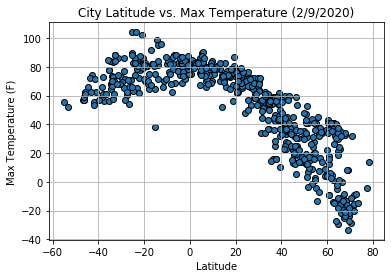

In [41]:
# Generate the Latitude vs. Temperature scatterplot 
fig1, ax1=plt.subplots()
ax1.scatter(Lat,maxtemp,edgecolors="black")
ax1.grid()
ax1.set_title ("City Latitude vs. Max Temperature (2/9/2020)")
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Max Temperature (F)")

# Save the plotted figures as .pngs.
plt.savefig("Lat vs Temp")

#### Latitude vs. Humidity Plot

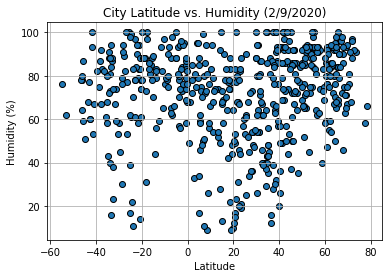

In [47]:
# Generate the Latitude vs. Humidity scatterplot 
fig2, ax2=plt.subplots()
ax2.scatter(Lat,Humidity,edgecolors="black")
ax2.grid()
ax2.set_title ("City Latitude vs. Humidity (2/9/2020)")
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Humidity (%)")

# Save the plotted figures as .pngs.
plt.savefig("Lat vs Humidity")

#### Latitude vs. Cloudiness Plot

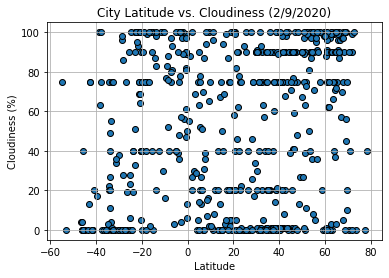

In [51]:
# Generate the Latitude vs. Cloudiness scatterplot 
fig3, ax3=plt.subplots()
ax3.scatter(Lat,Cloudiness,edgecolors="black")
ax3.grid()
ax3.set_title ("City Latitude vs. Cloudiness (2/9/2020)")
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Cloudiness (%)")

# Save the plotted figures as .pngs.
plt.savefig("Lat vs Cloudiness")

#### Latitude vs. Wind Speed Plot

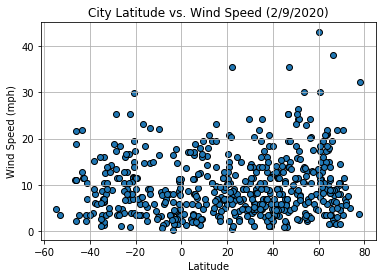

In [50]:
# Generate the Latitude vs. Wind Speed scatterplot 
fig4, ax4=plt.subplots()
ax4.scatter(Lat,windspeed,edgecolors="black")
ax4.grid()
ax4.set_title ("City Latitude vs. Wind Speed (2/9/2020)")
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Wind Speed (mph)")

# Save the plotted figures as .pngs.
plt.savefig("Lat vs Wind Speed")

Observable Trend #1
Generally speaking, the closer a city is to equator, the higher the temperature gets. 

Observable Trend #2
Generally speaking, wind speed in a city does not have much correlation with its latitude, but it's rare for the wind speed to exceed 20 mph.

Observable Trend #3
Generally speaking, humidity and cloudiness in a city does not have much correlation with its latitude, and the range is pretty wide.